In [39]:
import matplotlib.pyplot as plt
import io
from PIL import Image
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch

In [33]:
# Function to render bounding boxes on the image
def render_results_in_image(in_pil_img, in_results, id2label):
    plt.figure(figsize=(16, 10))
    plt.imshow(in_pil_img)

    ax = plt.gca()

    # Iterate over predictions and draw bounding boxes with labels
    for prediction in in_results:
        box = prediction["box"]
        label = prediction["label"]
        score = prediction["score"]

        x, y, w, h = box["xmin"], box["ymin"], box["xmax"] - box["xmin"], box["ymax"] - box["ymin"]

        # Add bounding box
        ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, color="green", linewidth=2))

        # Add label and confidence
        ax.text(
            x,
            y,
            f"{id2label[label]}: {round(score * 100, 1)}%",
            color='red',
            fontsize=12,
            bbox=dict(facecolor="white", alpha=0.5),
        )

    plt.axis("off")
    plt.show()

In [34]:

# Load image
image_path = "/content/__results___13_0.png"
image = Image.open(image_path)

In [35]:

# Load model and processor
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101", revision="no_timm")


In [36]:
# Prepare inputs
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

In [37]:
# Post-process predictions
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

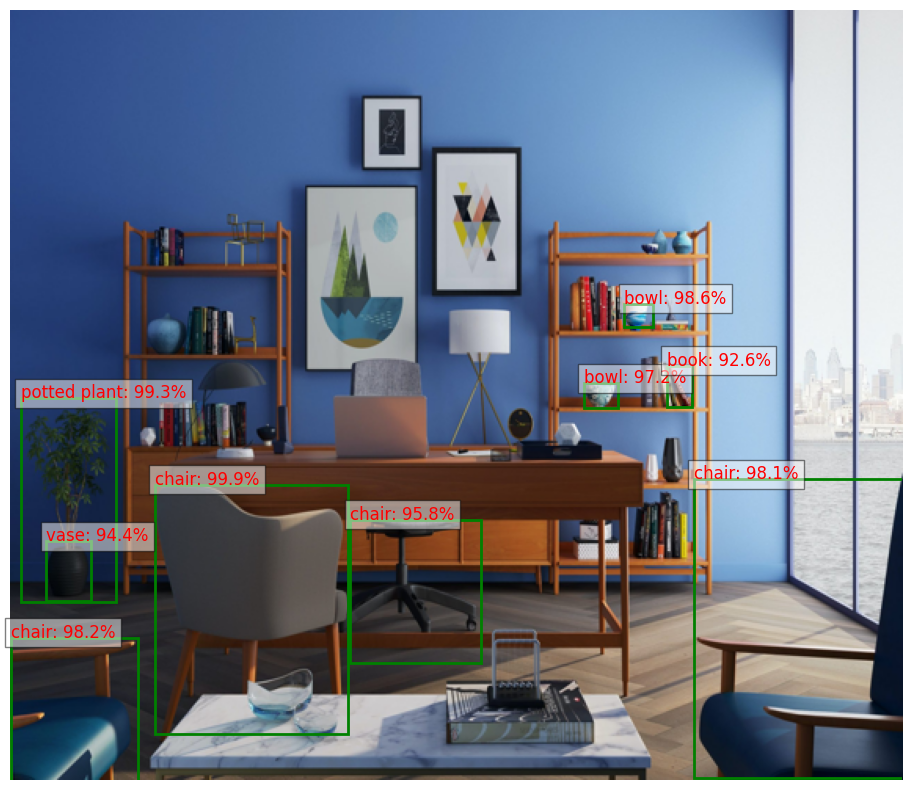

In [38]:
# Prepare results for rendering
detections = []
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    detections.append({
        "box": {
            "xmin": box[0].item(),
            "ymin": box[1].item(),
            "xmax": box[2].item(),
            "ymax": box[3].item(),
        },
        "label": label.item(),
        "score": score.item(),
    })

# Render the bounding boxes on the image
render_results_in_image(image, detections, model.config.id2label)